This notebook is is dedicated to analysis of CorovaVirus (COVID-19) outbreak data. Analysis includes visualizations and some predictions. Data is provided by John Hopkins University - https://github.com/CSSEGISandData/COVID-19

In [140]:
# import reuqired libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
plt.style.use('fivethirtyeight')
import datetime

In [141]:
# get data from https://github.com/CSSEGISandData/COVID-19, provided by Johns Hopkins University

confirmed = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

## 1. Global Trends

### 1.1 Latest data update

The data is upated on a daily basis. Let's extract last update date of the data.

In [142]:
latest_date = datetime.datetime(int(confirmed.columns[-1].split("/")[2]),
                               int(confirmed.columns[-1].split("/")[0]),
                               int(confirmed.columns[-1].split("/")[1])).strftime("%B %d")

print("Data is as of", latest_date)

Data is as of April 13


### 1.2 Daily confirmed cases

One of the most important indicators about the outbreak is the trend of global CONFIRMED cases. 

In [143]:
# get daily confirmed cases
confirmed_daily = confirmed.iloc[:, 4:].sum() 
confirmed_daily = pd.DataFrame({'date':confirmed_daily.index, 'confirmed_count':confirmed_daily.values})
confirmed_daily.date = pd.to_datetime(confirmed_daily.date)

# confirmed case counts higher than 99999
confirmed_daily[confirmed_daily.confirmed_count > 99999] 

,date,confirmed_count
44,2020-03-06,101801
45,2020-03-07,105847
46,2020-03-08,109821
47,2020-03-09,113590
48,2020-03-10,118620
49,2020-03-11,125875
50,2020-03-12,128352
51,2020-03-13,145205
52,2020-03-14,156101
53,2020-03-15,167454


From this data we can see that the number of confirmed cases increases exponentially. Below, I will further analyse exponential growth of the confirmed cases for selected countries. For now, let's see how long does it take to reach every 100000th confirmed case.

In [144]:
# time period for every 100000th confirmed case
print(confirmed_daily.date[44] - confirmed_daily.date[0], '    first 100000 cases')
print(confirmed_daily.date[56] - confirmed_daily.date[44], '   + 100000 cases')
print(confirmed_daily.date[59] - confirmed_daily.date[56], '    + 100000 cases')
print(confirmed_daily.date[62] - confirmed_daily.date[59], '    + 100000 cases')
print(confirmed_daily.date[64] - confirmed_daily.date[62], '    + 100000 cases')
print(confirmed_daily.date[66] - confirmed_daily.date[64], '    + 100000 cases')
print(confirmed_daily.date[67] - confirmed_daily.date[66], '    + 100000 cases')
print(confirmed_daily.date[69] - confirmed_daily.date[67], '    + 100000 cases')
print(confirmed_daily.date[70] - confirmed_daily.date[69], '    + 100000 cases')

44 days 00:00:00     first 100000 cases
12 days 00:00:00    + 100000 cases
3 days 00:00:00     + 100000 cases
3 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
1 days 00:00:00     + 100000 cases
2 days 00:00:00     + 100000 cases
1 days 00:00:00     + 100000 cases


As see above there is a disappoing fact that the number of confirmed cases increase very fast - it takes shorter and shorter time period to reach every 100000th confirmed case. Let's see it visually for March.

In [145]:
confirmed_daily_March = confirmed_daily[confirmed_daily.date <= '2020-04-01']
confirmed_daily_March

,date,confirmed_count
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
66,2020-03-28,660693
67,2020-03-29,720140
68,2020-03-30,782389
69,2020-03-31,857487


(array([737446., 737490., 737502., 737505., 737508., 737510., 737512.,
        737513.]), <a list of 8 Text xticklabel objects>)

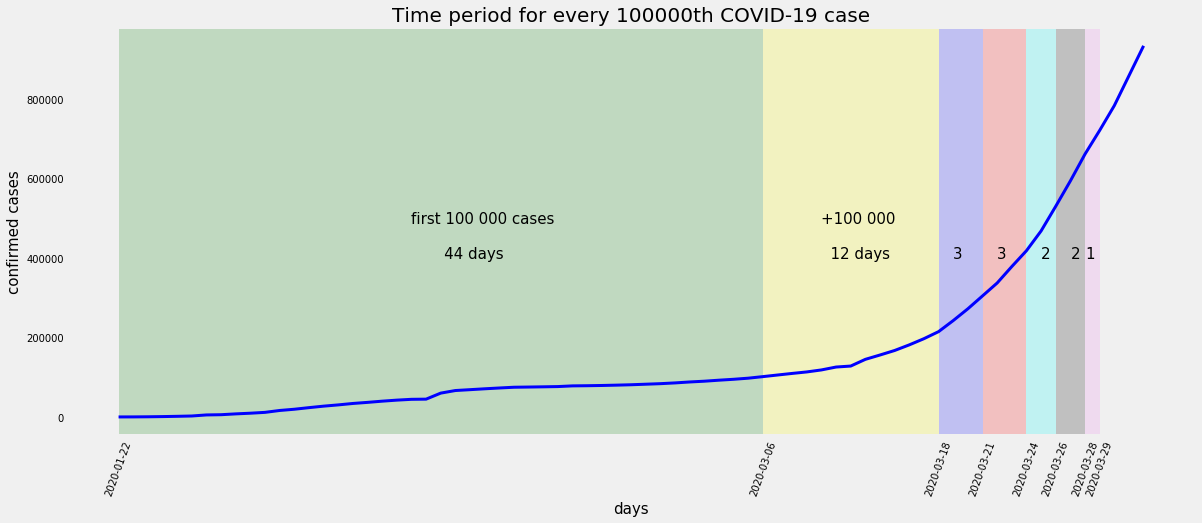

In [146]:
plt.figure(figsize=(18, 7))
plt.plot(confirmed_daily_March.date, confirmed_daily_March.confirmed_count, linewidth=3, color='b')
plt.title('Time period for every 100000th COVID-19 case', size=20)
plt.xlabel('days', size=15)
plt.ylabel('confirmed cases', size=15)
plt.xticks(size=10)
plt.yticks(size=10)
# plt.gca().set_facecolor('w')
plt.grid(False)
plt.axvspan(confirmed_daily_March.date[0], confirmed_daily_March.date[44], facecolor='green', alpha=0.2)
plt.text(confirmed_daily_March.date[20], 400000, 'first 100 000 cases \n\n       44 days', size=15)
plt.axvspan(confirmed_daily_March.date[44], confirmed_daily_March.date[56], facecolor='yellow', alpha=0.2)
plt.text(confirmed_daily_March.date[48], 400000, '+100 000 \n\n  12 days', size=15)
plt.axvspan(confirmed_daily_March.date[56], confirmed_daily_March.date[59], facecolor='blue', alpha=0.2)
plt.text(confirmed_daily_March.date[57], 400000, '3', size=15)
plt.axvspan(confirmed_daily_March.date[59], confirmed_daily_March.date[62], facecolor='red', alpha=0.2)
plt.text(confirmed_daily_March.date[60], 400000, '3', size=15)
plt.axvspan(confirmed_daily_March.date[62], confirmed_daily_March.date[64], facecolor='cyan', alpha=0.2)
plt.text(confirmed_daily_March.date[63], 400000, '2', size=15)
plt.axvspan(confirmed_daily_March.date[64], confirmed_daily_March.date[66], facecolor='black', alpha=0.2)
plt.text(confirmed_daily_March.date[65], 400000, '2', size=15)
plt.axvspan(confirmed_daily_March.date[66], confirmed_daily_March.date[67], facecolor='violet', alpha=0.2)
plt.text(confirmed_daily_March.date[66], 400000, '1', size=15)
plt.xticks([confirmed_daily_March.date[0], confirmed_daily_March.date[44], confirmed_daily_March.date[56], confirmed_daily_March.date[59],
           confirmed_daily_March.date[62], confirmed_daily_March.date[64], confirmed_daily_March.date[66], confirmed_daily_March.date[67]])
plt.xticks(rotation=70)

There could be a number of reasons for such an extraordinary growth of confirmed cases. For example, an increasing number of tests conducted by countries. The higher the number of tests, the higher the number of positive cases.  

With this pace, we are going to reach the 1 000 000th confirmed case in the first week of April

### 1.3 Combining Confirmed, Deaths and Recoveries data

In [147]:
confirmed_latest = confirmed.iloc[:, [1,-1]].groupby('Country/Region').sum()
deaths_latest = deaths.iloc[:, [1,-1]].groupby('Country/Region').sum()
recoveries_latest = recoveries.iloc[:, [1,-1]].groupby('Country/Region').sum()

In [148]:
confirmed_latest

,4/13/20
Country/Region,
Afghanistan,665
Albania,467
Algeria,1983
Andorra,646
Angola,19
...,...
West Bank and Gaza,308
Western Sahara,6
Yemen,1


In [149]:
# combine datasets and add Active count
full_df = pd.concat([confirmed_latest, deaths_latest, recoveries_latest], axis=1)
full_df.columns = ['confirmed', 'deaths', 'recoveries']
full_df['active'] = full_df.confirmed - full_df.deaths - full_df.recoveries
full_df.head(11)

,confirmed,deaths,recoveries,active
Country/Region,,,,
Afghanistan,665,21,32,612
Albania,467,23,232,212
Algeria,1983,313,601,1069
Andorra,646,29,128,489
Angola,19,2,4,13
Antigua and Barbuda,23,2,0,21
Argentina,2208,97,515,1596
Armenia,1039,14,211,814
Australia,6351,61,1806,4484


Let's concentrate on top 15 countries.

### Here are top 15 countries with CONFIRMED cases

In [150]:
full_df.confirmed.sort_values(ascending=False).head(15)

Country/Region
US                580619
Spain             170099
Italy             159516
France            137875
Germany           130072
United Kingdom     89570
China              83213
Iran               73303
Turkey             61049
Belgium            30589
Netherlands        26710
Switzerland        25688
Canada             25679
Brazil             23430
Russia             18328
Name: confirmed, dtype: int64

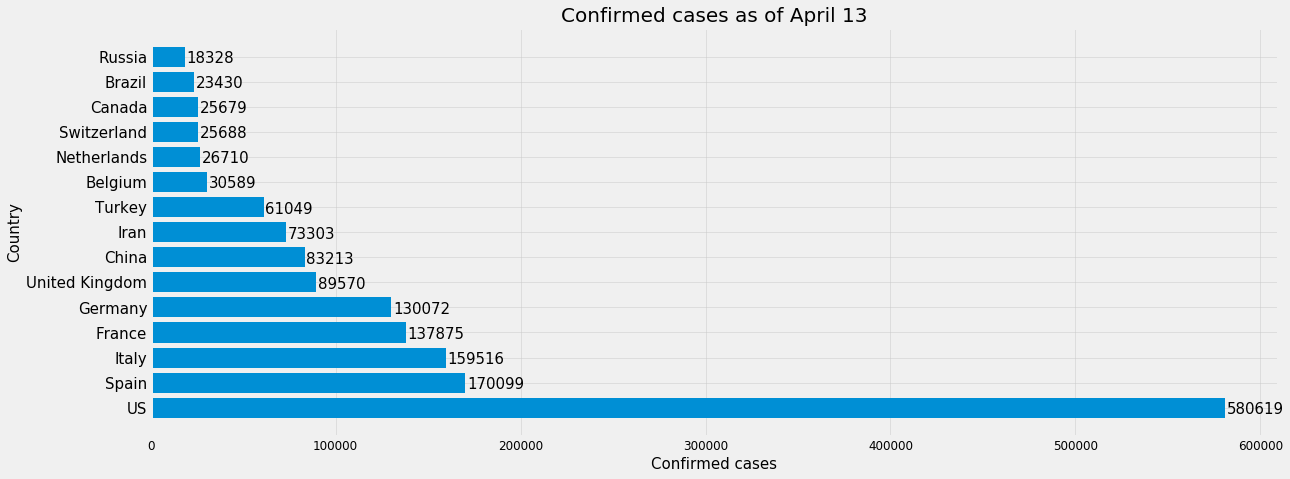

In [151]:
confirmed_top15 = full_df.confirmed.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(confirmed_top15.index, confirmed_top15)
plt.title('Confirmed cases as of ' + latest_date, size=20)
plt.xlabel('Confirmed cases', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(alpha = .5)
for index, value in enumerate(confirmed_top15):
    plt.text(value + 1000, index - .25, str(value), size=15)

US, Italy and Spain are leaders.

### ACTIVE cases

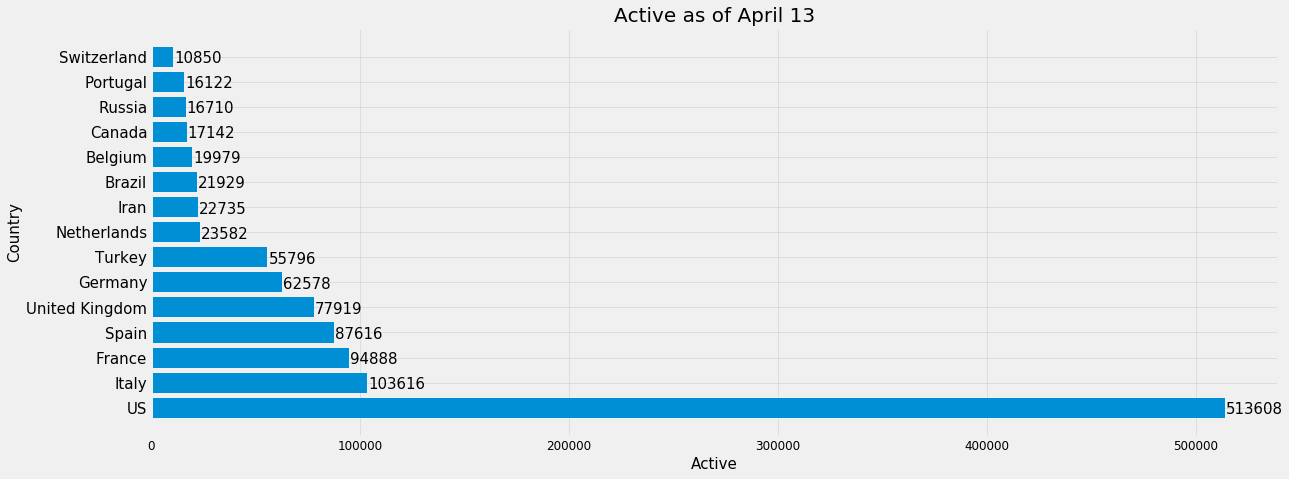

In [152]:
active_top15 = full_df.active.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(active_top15.index, active_top15)
plt.title('Active as of ' + latest_date, size=20)
plt.xlabel('Active', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(alpha = .5)
for index, value in enumerate(active_top15):
    plt.text(value + 500, index - .25, str(value), size=15)

### DEATHS

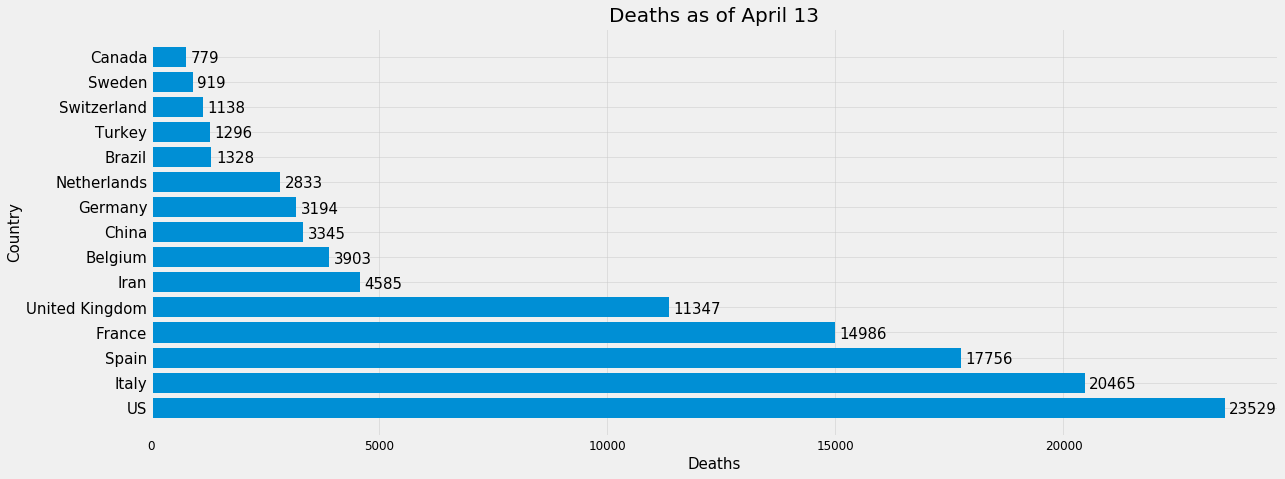

In [153]:
deaths_top15 = full_df.deaths.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(deaths_top15.index, deaths_top15)
plt.title('Deaths as of ' + latest_date, size=20)
plt.xlabel('Deaths', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(alpha = .5)
for index, value in enumerate(deaths_top15):
    plt.text(value + 100, index - .25, str(value), size=15)

Italy has one of the highest number of deaths. One reason for this is the fact that Italy has one of the highly aged populations in the world and most victims of the COVID-19 are people aged over 65. 
In the coming days we can expect US reach Italy, since US has the most confimred cases so far.  

### RECOVERIES

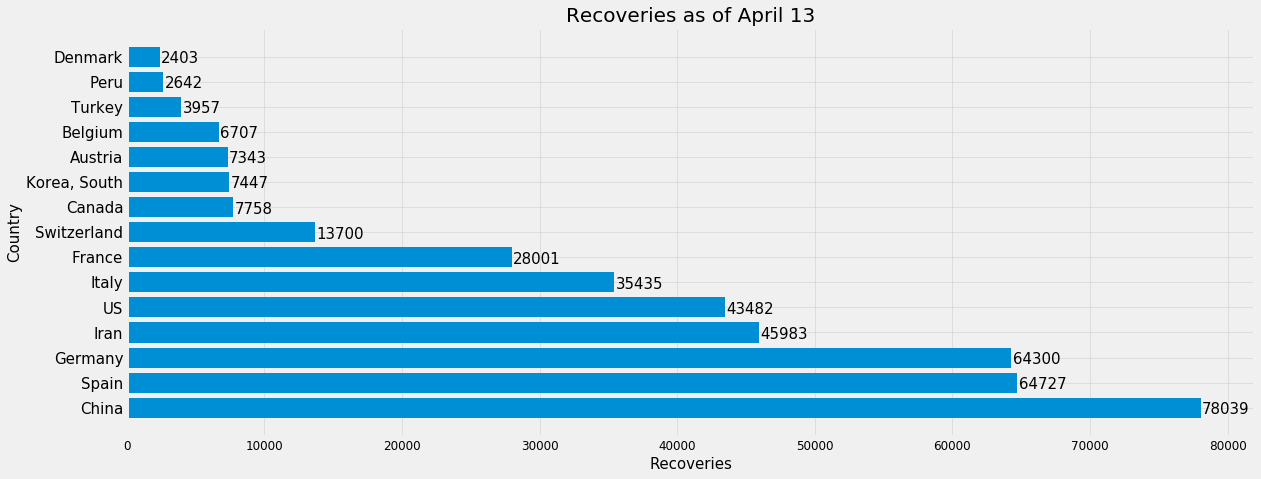

In [154]:
recoveries_top15 = full_df.recoveries.sort_values(ascending=False).head(15)
plt.figure(figsize=(18, 7))
plt.barh(recoveries_top15.index, recoveries_top15)
plt.title('Recoveries as of ' + latest_date, size=20)
plt.xlabel('Recoveries', size=15)
plt.ylabel('Country', size=15)
plt.xticks(size=12)
plt.yticks(size=15)
plt.grid(alpha = .5)
for index, value in enumerate(recoveries_top15):
    plt.text(value+100, index - .25, str(value), size=15)

China has the most number of revovered people, since it was the first country where virus started to spread and many people have already recovered from the disease. Perphaps this could also be related to the fact that China has realtively younger people (in contrast to Italy).

## 2. Country based analysis

As an itital step we need daily data for the selected countries. I will later select some of these countries for a more detailed analysis. 

In [155]:
confirmed_trend_top15 = confirmed.drop(['Province/State', 'Lat', 'Long'], axis=1) \
    .groupby('Country/Region') \
    .sum() \
    .loc[confirmed_top15.index] \
    .T

confirmed_trend_top15.index = pd.to_datetime(confirmed_trend_top15.index)

In [156]:
confirmed_trend_top15.iloc[-1,:]

Country/Region
US                580619
Spain             170099
Italy             159516
France            137875
Germany           130072
United Kingdom     89570
China              83213
Iran               73303
Turkey             61049
Belgium            30589
Netherlands        26710
Switzerland        25688
Canada             25679
Brazil             23430
Russia             18328
Name: 2020-04-13 00:00:00, dtype: int64

We also need death, recovery and active case data for top 15 countries

In [157]:
deaths_trend_top15 = deaths.drop(['Province/State', 'Lat', 'Long'], axis=1) \
    .groupby('Country/Region') \
    .sum() \
    .loc[confirmed_top15.index] \
    .T
deaths_trend_top15.index = pd.to_datetime(deaths_trend_top15.index)

In [158]:
recoveries_trend_top15 = recoveries.drop(['Province/State', 'Lat', 'Long'], axis=1) \
    .groupby('Country/Region') \
    .sum() \
    .loc[confirmed_top15.index] \
    .T
recoveries_trend_top15.index = pd.to_datetime(recoveries_trend_top15.index)

In [159]:
active_trend_top15 = confirmed_trend_top15 - deaths_trend_top15 - recoveries_trend_top15
active_trend_top15.head()

Country/Region,US,Spain,Italy,France,Germany,United Kingdom,China,Iran,Turkey,Belgium,Netherlands,Switzerland,Canada,Brazil,Russia
2020-01-22,1,0,0,0,0,0,503,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,595,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,2,0,0,858,0,0,0,0,0,0,0,0
2020-01-25,2,0,0,3,0,0,1325,0,0,0,0,0,0,0,0
2020-01-26,5,0,0,3,0,0,1970,0,0,0,0,0,1,0,0


## Country - US

The most critical sitution is currently in the US. 
At COVID-19 GitHub data repository by John Hopkins University there is time series data about US confirmed and death cases.
Let's first check those data.

In [160]:
confirmed_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
deaths_US = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')

In [161]:
# transform US confirmed and deaths data
confirmed_latest_US = confirmed_US.iloc[:, [6,-1]].groupby('Province_State').sum()
confirmed_latest_US.columns = ['confirmed']
confirmed_latest_US = confirmed_latest_US.sort_values('confirmed', ascending=False).head(10)

deaths_latest_US = deaths_US.iloc[:, [6,-1]].groupby('Province_State').sum()
deaths_latest_US.columns = ['deaths']
deaths_latest_US = deaths_latest_US.sort_values('deaths', ascending=False).head(10)

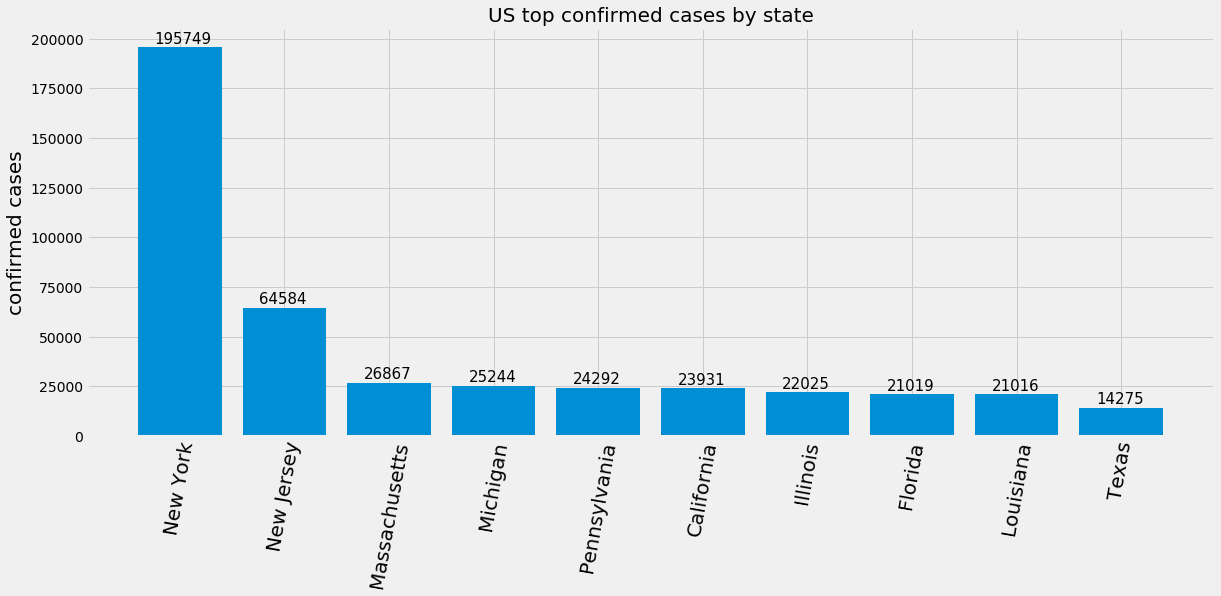

In [162]:
fig, ax = plt.subplots(figsize=(18, 7))
bar_US_cf = ax.bar(confirmed_latest_US.index, confirmed_latest_US.confirmed)
ax.set_xticklabels(confirmed_latest_US.index, rotation=80, size=20)
ax.set_ylabel('confirmed cases', size=20)
ax.set_title('US top confirmed cases by state', size=20)
for i in np.arange(len(confirmed_latest_US)):
    ax.annotate(bar_US_cf[i].get_height(),
    xy=(bar_US_cf[i].get_x() + bar_US_cf[i].get_width() / 5, bar_US_cf[i].get_height() + 2000),
    size=15)
    
plt.savefig('US_confirmedbyState')

The worst case is in New York. New York has times more confirmed cases compared to New Jersey - second state with the highest number fo cases.

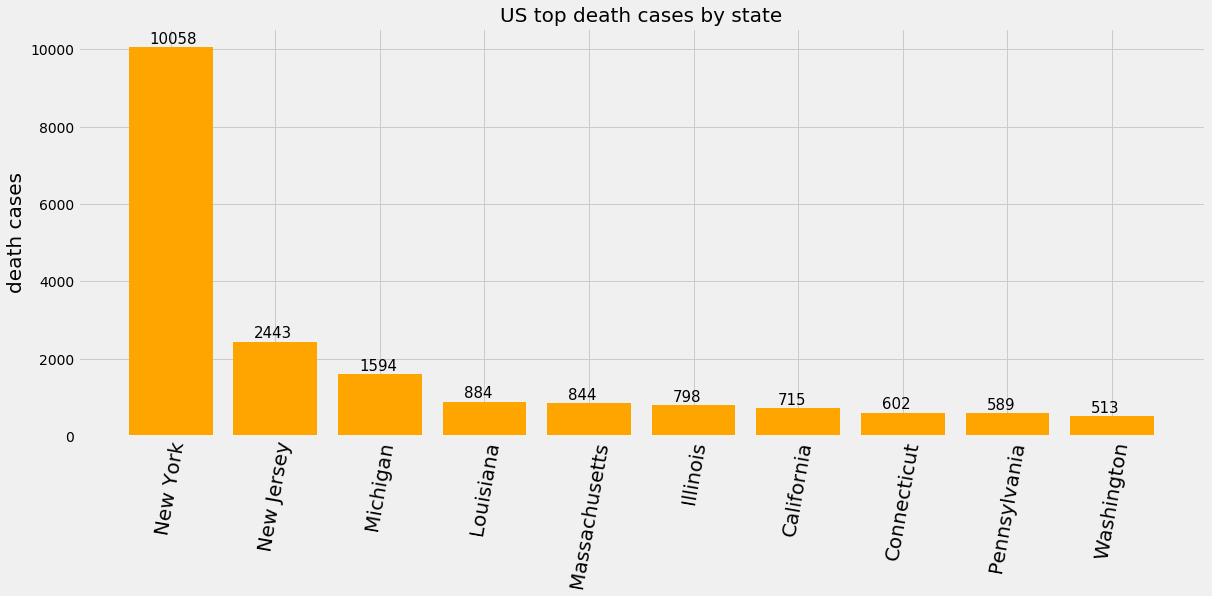

In [163]:
fig, ax = plt.subplots(figsize=(18, 7))
bar_US_de = ax.bar(deaths_latest_US.index, deaths_latest_US.deaths, color='orange')
ax.set_xticklabels(deaths_latest_US.index, rotation=80, size=20)
ax.set_ylabel('death cases', size=20)
ax.set_title('US top death cases by state', size=20)
for i in np.arange(len(deaths_latest_US)):
    ax.annotate(bar_US_de[i].get_height(),
    xy=(bar_US_de[i].get_x() + bar_US_de[i].get_width() / 4, bar_US_de[i].get_height() + 100),
    size=15)
    
plt.savefig('US_deathbyState')

The most deaths is in New York, followed by New Jersey and Michigan.

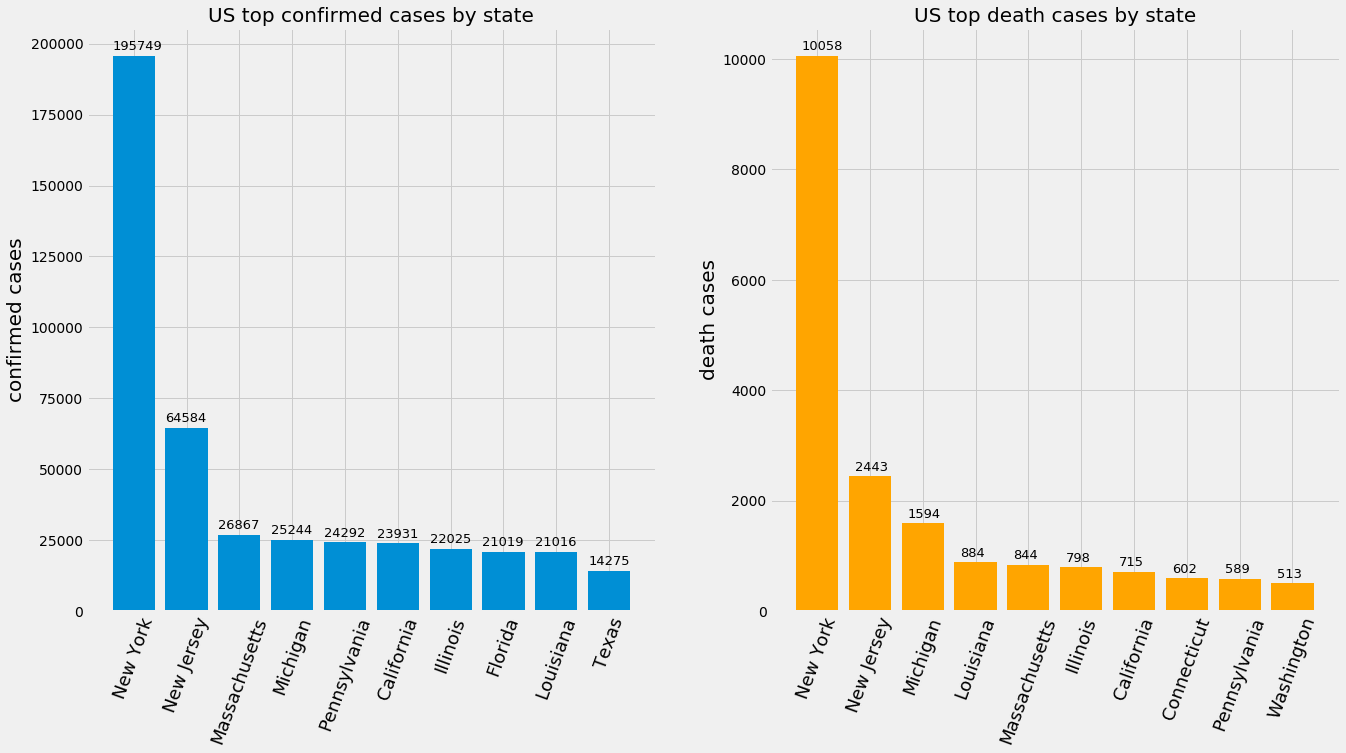

In [164]:
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

bar_US_cf = ax[0].bar(confirmed_latest_US.index, confirmed_latest_US.confirmed)
ax[0].set_xticklabels(confirmed_latest_US.index, rotation=70, size=18)
ax[0].set_ylabel('confirmed cases', size=20)
ax[0].set_title('US top confirmed cases by state', size=20)
for i in np.arange(len(confirmed_latest_US)):
    ax[0].annotate(bar_US_cf[i].get_height(),
    xy=(bar_US_cf[i].get_x() + bar_US_cf[i].get_width()/500, bar_US_cf[i].get_height() + 2000),
    size=13)
    
bar_US_de = ax[1].bar(deaths_latest_US.index, deaths_latest_US.deaths, color='orange')
ax[1].set_xticklabels(deaths_latest_US.index, rotation=70, size=18)
ax[1].set_ylabel('death cases', size=20)
ax[1].set_title('US top death cases by state', size=20)
for i in np.arange(len(deaths_latest_US)):
    ax[1].annotate(bar_US_de[i].get_height(),
    xy=(bar_US_de[i].get_x() + bar_US_de[i].get_width() / 7, bar_US_de[i].get_height() + 100),
    size=13)

### US Confirmed cases trend

Let's first create some functins for easy plotting.

In [165]:
# create a function to plot trends for confirmed, active, death and recovery cases

def plot_all_cumulative_trends(country, period='2020-01-22'):
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle(country + ' COVID-19 cumulative case trends', size=25)
    fig.tight_layout(pad=9.0)

    ax[0,0].plot(confirmed_trend_top15[period:][country].index, confirmed_trend_top15[period:][country])
    ax[0,0].set_title('Confirmed cases', size=20)
    ax[0,0].set_ylabel('case count', size=20)
    ax[0,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    ax[0,0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax[0,0].tick_params(axis='y', labelsize=15)
    ax[0,0].tick_params(axis='x', labelsize=15, rotation=270)

    ax[0,1].plot(active_trend_top15[period:][country].index, active_trend_top15[period:][country], color='orange')
    ax[0,1].set_title('Active cases', size=20)
    ax[0,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    ax[0,1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax[0,1].tick_params(axis='y', labelsize=15)
    ax[0,1].tick_params(axis='x', labelsize=15, rotation=270)

    ax[1,0].plot(deaths_trend_top15[period:][country].index, deaths_trend_top15[period:][country], color='red')
    ax[1,0].set_title('Death cases', size=20)
    ax[1,0].set_ylabel('case count', size=20)
    ax[1,0].set_xlabel('days', size=20)
    ax[1,0].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    ax[1,0].xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax[1,0].tick_params(axis='y', labelsize=15)
    ax[1,0].tick_params(axis='x', labelsize=15, rotation=270)

    ax[1,1].plot(recoveries_trend_top15[period:][country].index, recoveries_trend_top15[period:][country], color='green')
    ax[1,1].set_title('Recoveries', size=20)
    ax[1,1].set_xlabel('days', size=20)
    ax[1,1].xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    ax[1,1].xaxis.set_major_locator(mdates.DayLocator(interval=5))
    ax[1,1].tick_params(axis='y', labelsize=15)
    ax[1,1].tick_params(axis='x', labelsize=15, rotation=270)

In [166]:
# create a function to plot daily trends

def plot_specific_trend(df, country, period, color, title, interval, ylabel):
    plt.figure(figsize=(18, 7))
    plt.plot(df[period:][country].index, df[period:][country], color, linestyle='--', linewidth=5)
    plt.title(title, size=25)
    plt.grid(alpha = 2)
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=interval))
    plt.xticks(size=15)
    plt.yticks(size=15)
    plt.xlabel('date', size=20)
    plt.ylabel(ylabel, size=20)

As an initial step let's see cumulative trends of all cases in the US 

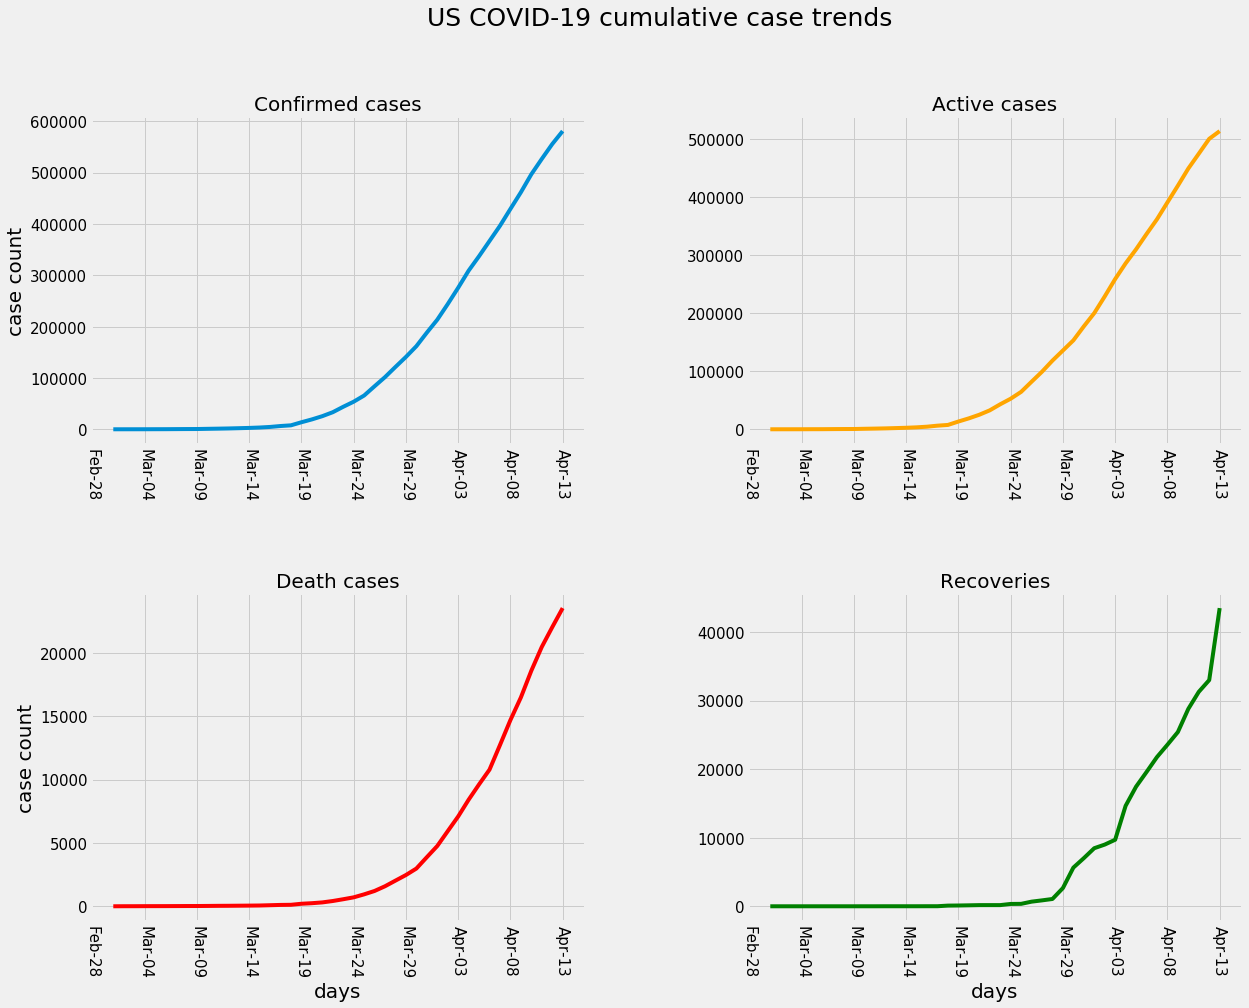

In [167]:
plot_all_cumulative_trends('US', '2020-03-01')

We observe exponential growth in all categories. This is good for Recoveries, but bad for confirmed and death cases. 
Even if total number of confirmed and death cases are growing, from these plots it not possible to see daily trends (increase or decrease).

### US confirmed cases trend analysis

As we see from plots above COVID-19 was most effective in the US since March. 

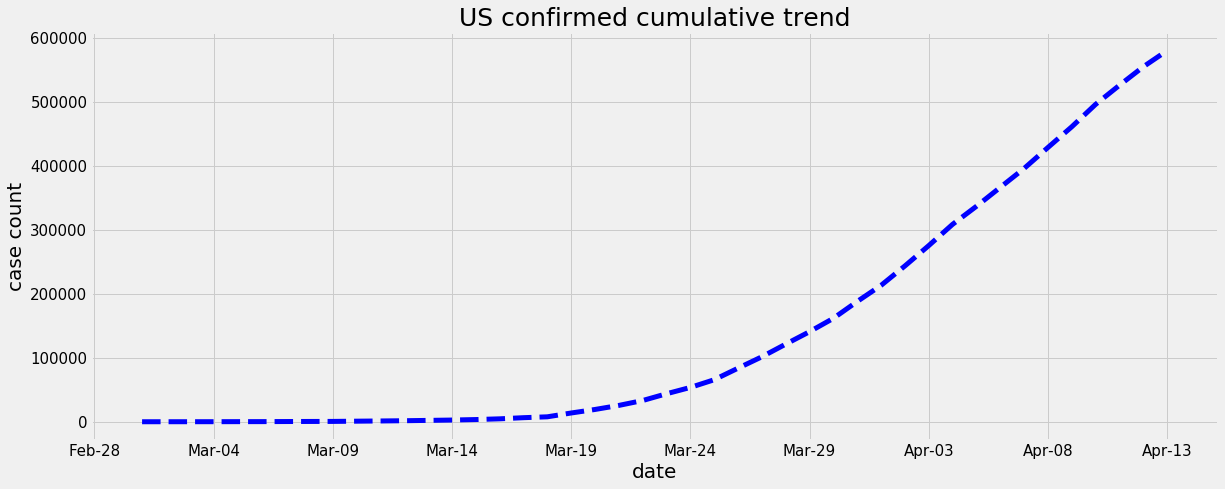

In [168]:
plot_specific_trend(confirmed_trend_top15, 'US', '2020-03-01', 'b', 'US confirmed cumulative trend', 5, 'case count' )

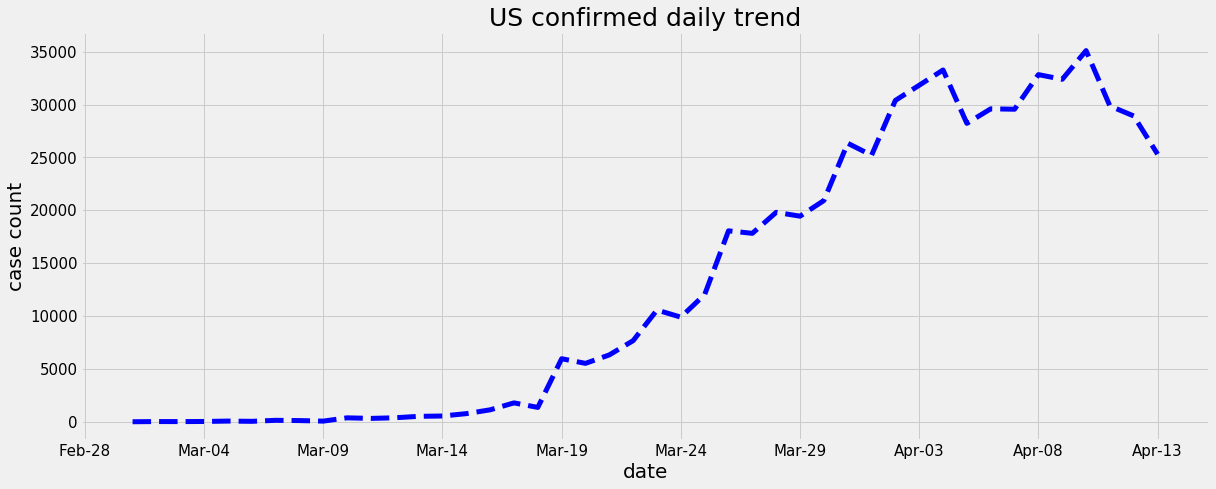

In [169]:
plot_specific_trend(confirmed_trend_top15.diff(), 'US', '2020-03-01', 'b', 'US confirmed daily trend', 5, 'case count')
# plt.savefig('USdailytrend')

It looks like the worst day in the US was on April 10. 

In [170]:
confirmed_trend_top15.diff()['US'].sort_values(ascending=False).head(1)

2020-04-10    35098.0
Name: US, dtype: float64

35098 positive cases in one day

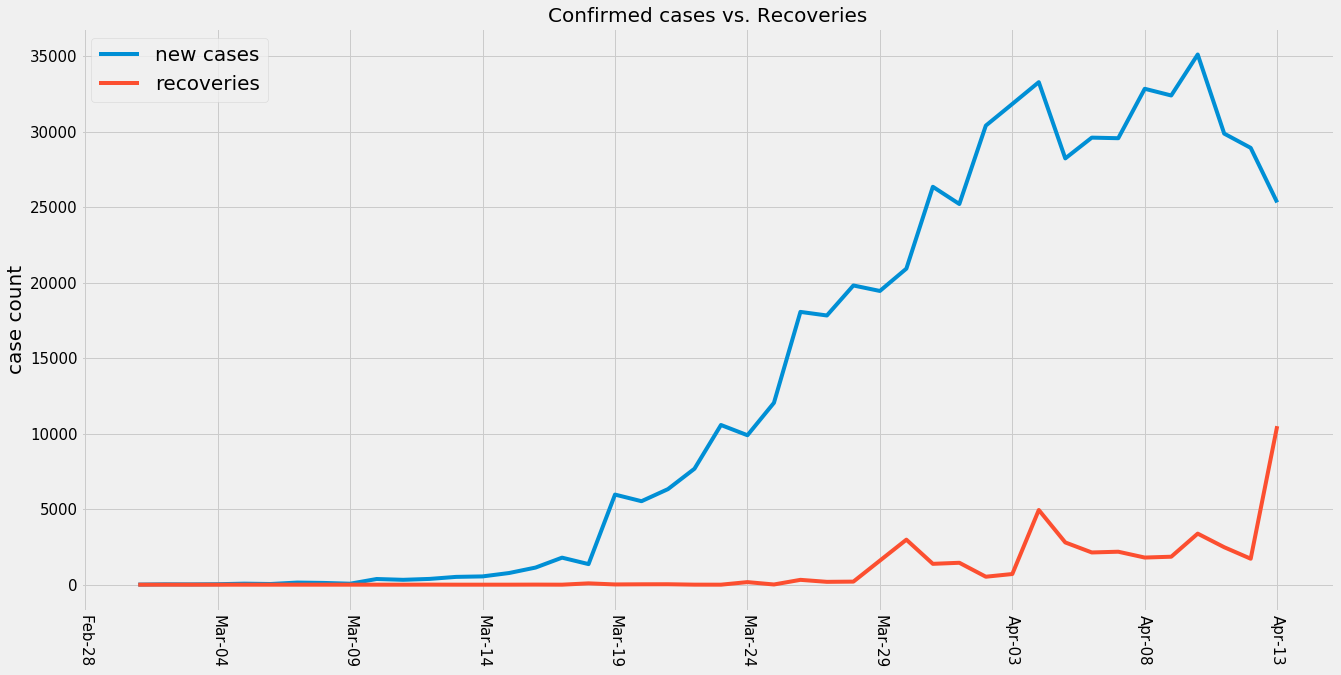

In [171]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(confirmed_trend_top15.diff()['2020-03-01':]['US'].index, confirmed_trend_top15.diff()['2020-03-01':]['US'], label='new cases')
ax.plot(recoveries_trend_top15.diff()['2020-03-01':]['US'].index, recoveries_trend_top15.diff()['2020-03-01':]['US'], label='recoveries')
ax.set_title('Confirmed cases vs. Recoveries', size=20)
ax.set_ylabel('case count', size=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15, rotation=270)
ax.legend(fontsize=20)
plt.savefig('US_dailyConfirmedVsRecovery')

As we notice from graph above is trend of new cases and recoveries gradually start to approach each other.

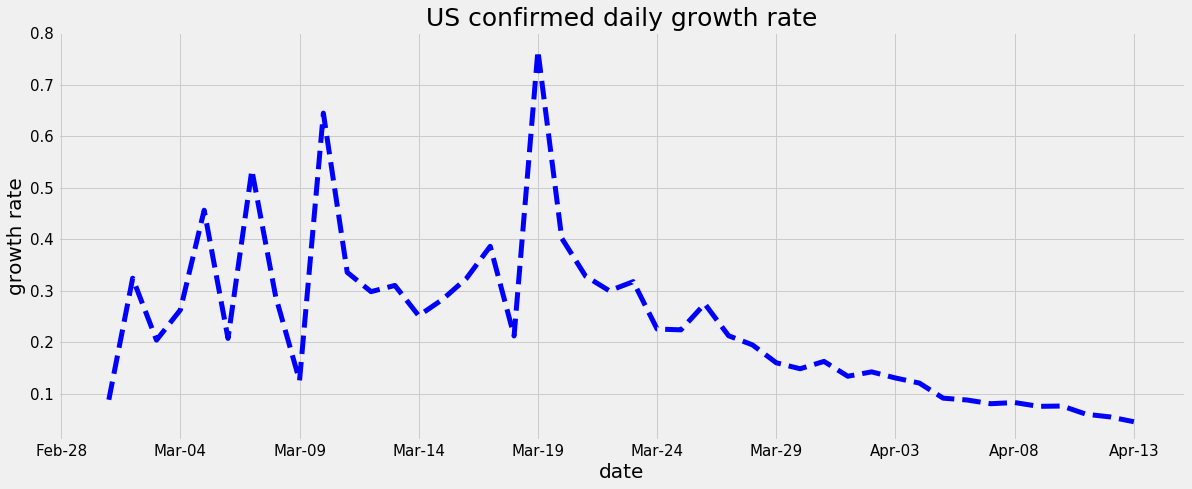

In [172]:
plot_specific_trend(confirmed_trend_top15.pct_change(), 'US', '2020-03-01', 'b', 'US confirmed daily growth rate', 5, 'growth rate')
# plt.savefig('USdailygrowth')

Although, daily COVID-19 positive cases show an increasing trend, in terms of growth rate there is an obvious decline. 
We can use daily growth rate trend to try to predict infections in coming days.

### Other Countries

Let's now focus a grop of countries in top15

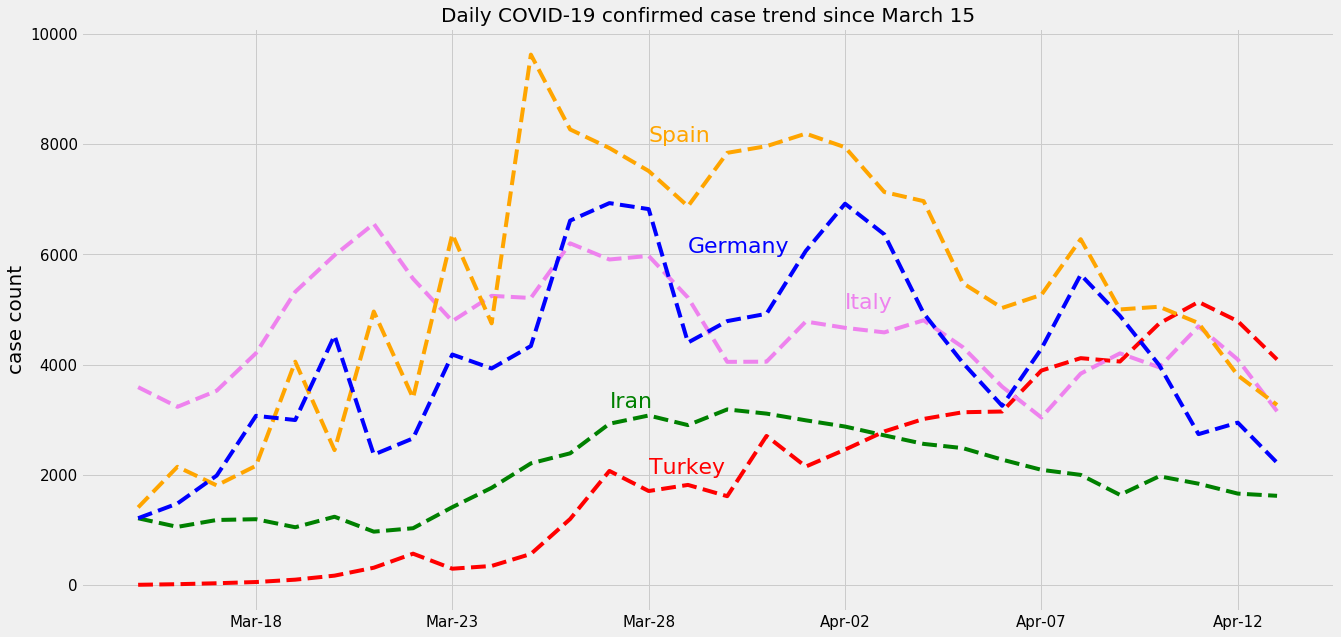

In [173]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Daily COVID-19 confirmed case trend since March 15', size=20)
ax.set_ylabel('case count', size=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

x = confirmed_trend_top15.diff()['2020-03-15':]

Turkey = x['Turkey']
Italy = x['Italy']
Spain = x['Spain']
Iran = x['Iran']
Germany = x['Germany']

ax.plot(x.index, Turkey,'--r', label='Turkey')
ax.plot(x.index, Italy, color='violet', linestyle='--', label='Italy')
ax.plot(x.index, Spain, color='orange',linestyle='--', label='Spain')
ax.plot(x.index, Iran, '--g', label='Iran')
ax.plot(x.index, Germany, color='b', linestyle='--', label='Germany')

ax.annotate('Turkey', xy=(x['Turkey'].index[-17], x['Turkey'][-15]+400), size=22, color='red')
ax.annotate('Italy', xy=(x['Italy'].index[-12], x['Italy'][-10]+200), size=22, color='violet')
ax.annotate('Spain', xy=(x['Spain'].index[-17], x['Spain'][-15]+200), size=22, color='orange')
ax.annotate('Iran', xy=(x['Iran'].index[-18], x['Iran'][-20]+1000), size=22, color='green')
ax.annotate('Germany', xy=(x['Germany'].index[-16], x['Germany'][-20]+1700), size=22, color='blue')

# ax.legend(fontsize=20)
plt.savefig('5countries_daily')

It looks like we have passed the peak of the outbreak - there is an obvious decline in most countries. Among those countries Turkey deserves a special attention - despite the fact that in last few days the number of postiive cases has started to decline, overall there is an incrasing trend of confirmed cases.

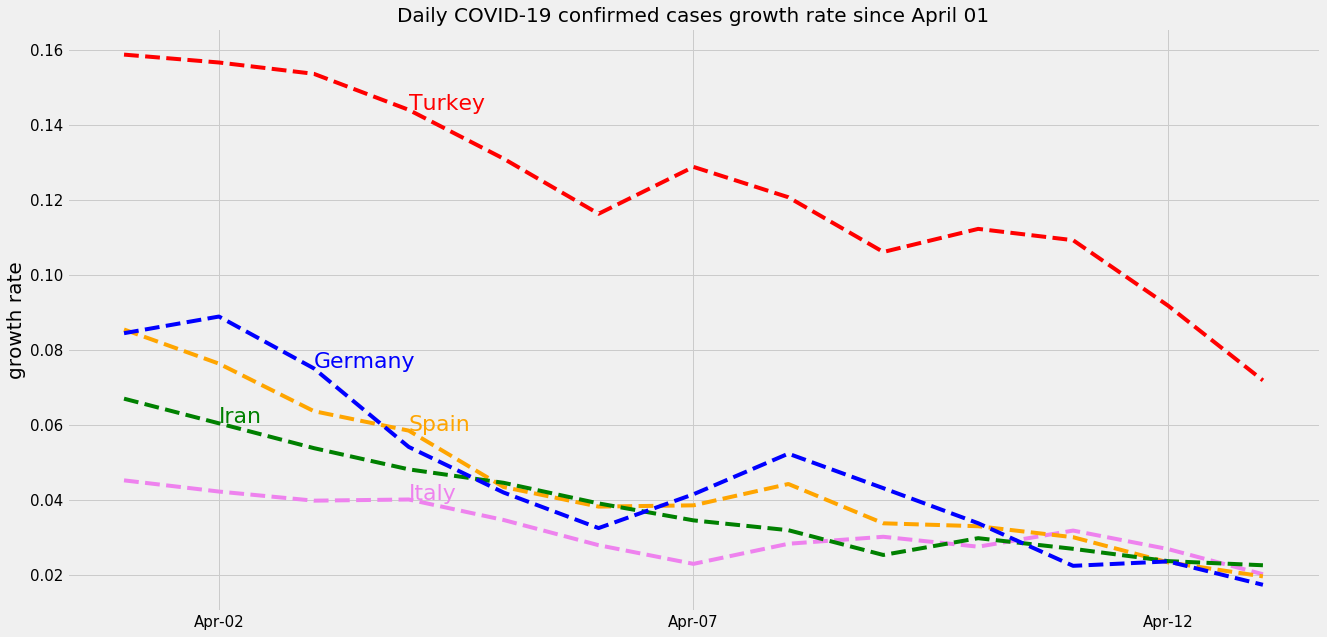

In [174]:
fig, ax = plt.subplots(figsize=(20, 10))

ax.set_title('Daily COVID-19 confirmed cases growth rate since April 01', size=20)
ax.set_ylabel('growth rate', size=20)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.tick_params(axis='y', labelsize=15)
ax.tick_params(axis='x', labelsize=15)

x = confirmed_trend_top15.pct_change()['2020-04-01':]
Turkey = x['Turkey']
Italy = x['Italy']
Spain = x['Spain']
Iran = x['Iran']
Germany = x['Germany']

ax.plot(x.index, Turkey,'--r', label='Turkey')
ax.plot(x.index, Italy, color='violet', linestyle='--', label='Italy')
ax.plot(x.index, Spain, color='orange',linestyle='--', label='Spain')
ax.plot(x.index, Iran, '--g', label='Iran')
ax.plot(x.index, Germany, color='b', linestyle='--', label='Germany')

ax.annotate('Turkey', xy=(x['Turkey'].index[-10], x['Turkey'][-10]), size=22, color='red')
ax.annotate('Italy', xy=(x['Italy'].index[-10], x['Italy'][-10]), size=22, color='violet')
ax.annotate('Spain', xy=(x['Spain'].index[-10], x['Spain'][-10]), size=22, color='orange')
ax.annotate('Iran', xy=(x['Iran'].index[-12], x['Iran'][-12]), size=22, color='green')
ax.annotate('Germany', xy=(x['Germany'].index[-11], x['Germany'][-11]), size=22, color='blue')

# ax.legend(fontsize=20)
plt.savefig('5countries_growth')

Another good news is that daily growth rate is declining in all countries as in the US

### Country - Turkey